In [117]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [118]:
data=pd.read_csv('earthquake_alert_balanced_dataset.csv')

In [119]:
data.head()


,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green


In [120]:
data.tail()


,magnitude,depth,cdi,mmi,sig,alert
1295,6.87,11.0,9.0,7.0,13.0,yellow
1296,7.85,93.0,8.0,6.0,-51.0,yellow
1297,7.48,142.0,7.0,6.0,120.0,yellow
1298,7.04,51.0,7.0,6.0,-115.0,yellow
1299,6.50,9.0,9.0,8.0,-29.0,yellow


In [121]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   float64
 2   cdi        1300 non-null   float64
 3   mmi        1300 non-null   float64
 4   sig        1300 non-null   float64
 5   alert      1300 non-null   object 
dtypes: float64(5), object(1)
memory usage: 61.1+ KB


In [122]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
magnitude,1300.0,7.061008,0.423738,6.5,6.7,7.0,7.3,8.6
depth,1300.0,50.321538,104.348286,2.0,12.0,19.0,38.0,670.0
cdi,1300.0,6.976154,2.244875,0.0,6.0,8.0,8.0,9.0
mmi,1300.0,6.939231,1.354774,1.0,6.0,7.0,8.0,9.0
sig,1300.0,-9.749231,62.245214,-128.0,-54.0,-7.0,31.0,127.0


In [123]:
data['alert'].value_counts()


alert
green     325
yellow    325
orange    325
red       325
Name: count, dtype: int64

In [124]:
X=data.drop("alert",axis=1)
y=data["alert"]

In [125]:
from sklearn.preprocessing import LabelEncoder,StandardScaler, OneHotEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [126]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42,stratify=y)

In [128]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
model=RandomForestClassifier()


In [129]:
scores=cross_val_score(model,X,y,cv=5,scoring='accuracy')


In [130]:
print("Cross-validation scores:",scores)


Cross-validation scores: [0.89615385 0.9        0.88461538 0.91153846 0.94230769]


In [131]:
print("Mean accuracy:",scores.mean())


Mean accuracy: 0.9069230769230769


In [132]:
model=RandomForestClassifier(class_weight='balanced',random_state=42,n_estimators=150)
model.fit(X_train,y_train)

,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [133]:
y_test_pred=model.predict(X_test)


In [134]:
from sklearn.metrics import accuracy_score,recall_score,recall_score,precision_score,classification_report,confusion_matrix,f1_score

In [135]:
def print_classification_metrics(y_true,y_pred,dataset_name="Dataset"):
    acc=accuracy_score(y_true,y_pred)
    prec=precision_score(y_true,y_pred,average='weighted')
    recc=recall_score(y_true,y_pred,average='weighted')
    f1=f1_score(y_true,y_pred,average='weighted')
    conf=confusion_matrix(y_true,y_pred)
    class_report=classification_report(y_true,y_pred)
    print(f"\n{dataset_name} Metrics:")
    print(f"Accuracy:{acc*100:.4f}%")
    print(f"Precision:{prec*100:.4f}%")
    print(f"Recall:{recc*100:.4f}%")
    print(f"F1 Score:{f1*100:.4f}%")
    print("Confusion Matrix:")
    print(conf)
    print("Classification Report:")
    print(class_report)

In [136]:
print_classification_metrics(y_test,y_test_pred,"Test Set")



Test Set Metrics:
Accuracy:91.2821%
Precision:91.6986%
Recall:91.2821%
F1 Score:91.3723%
Confusion Matrix:
[[43  0  1  5]
 [ 0 44  1  3]
 [ 0  0 47  2]
 [ 1  4  0 44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.92        49
           1       0.92      0.92      0.92        48
           2       0.96      0.96      0.96        49
           3       0.81      0.90      0.85        49

    accuracy                           0.91       195
   macro avg       0.92      0.91      0.91       195
weighted avg       0.92      0.91      0.91       195



In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   float64
 2   cdi        1300 non-null   float64
 3   mmi        1300 non-null   float64
 4   sig        1300 non-null   float64
 5   alert      1300 non-null   object 
dtypes: float64(5), object(1)
memory usage: 61.1+ KB


In [139]:
numeric_cols = data.select_dtypes(include=np.number).columns


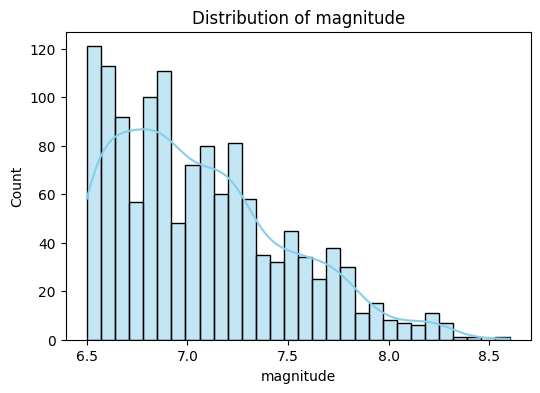

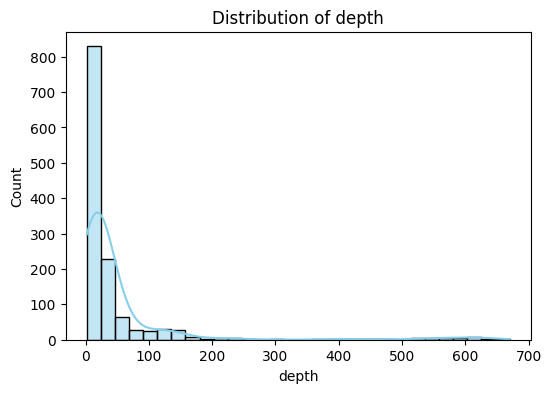

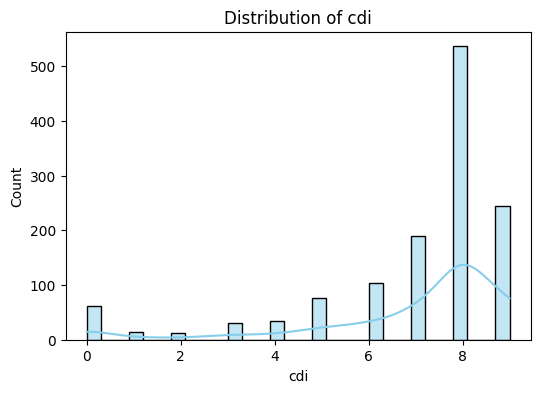

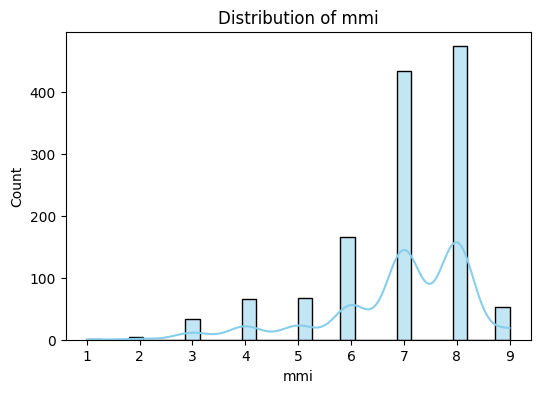

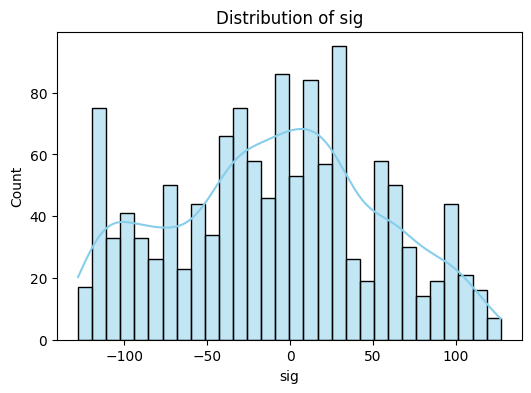

In [140]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


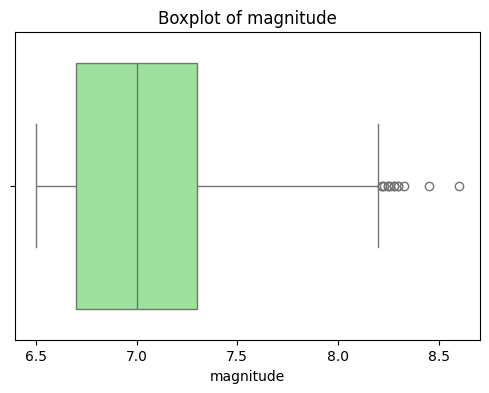

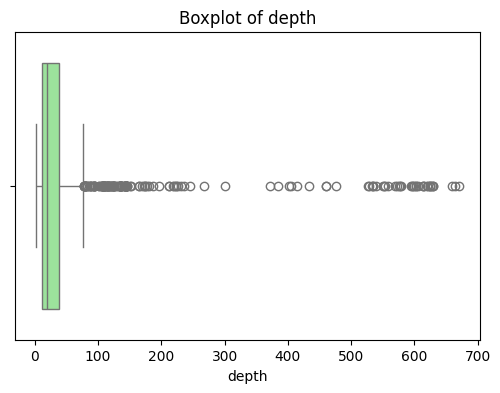

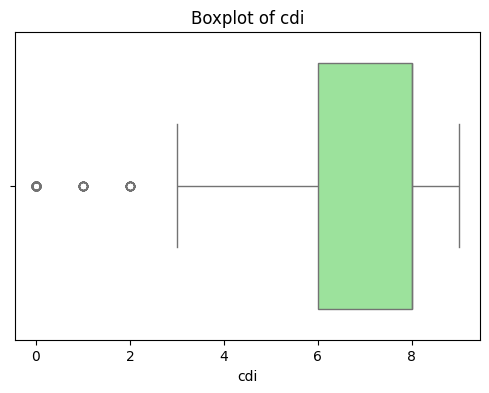

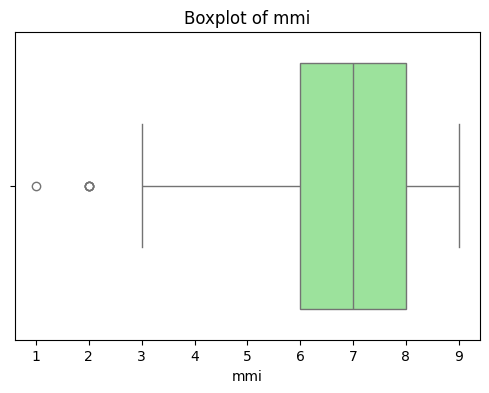

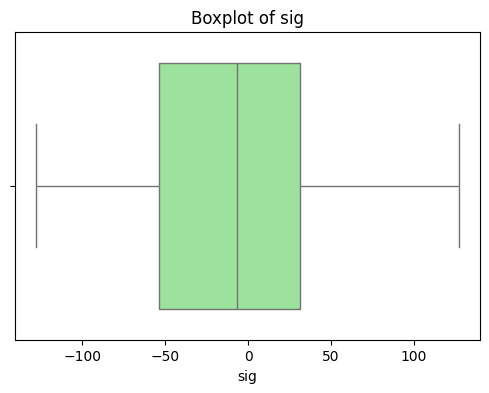

In [141]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [142]:
import matplotlib.pyplot as plt
import itertools

numeric_cols = data.select_dtypes(include='number').columns

feature_pairs = list(itertools.combinations(numeric_cols, 2))

n_pairs = len(feature_pairs)
n_cols = 3
n_rows = (n_pairs // n_cols) + 1

/tmp/ipykernel_40307/3896263781.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


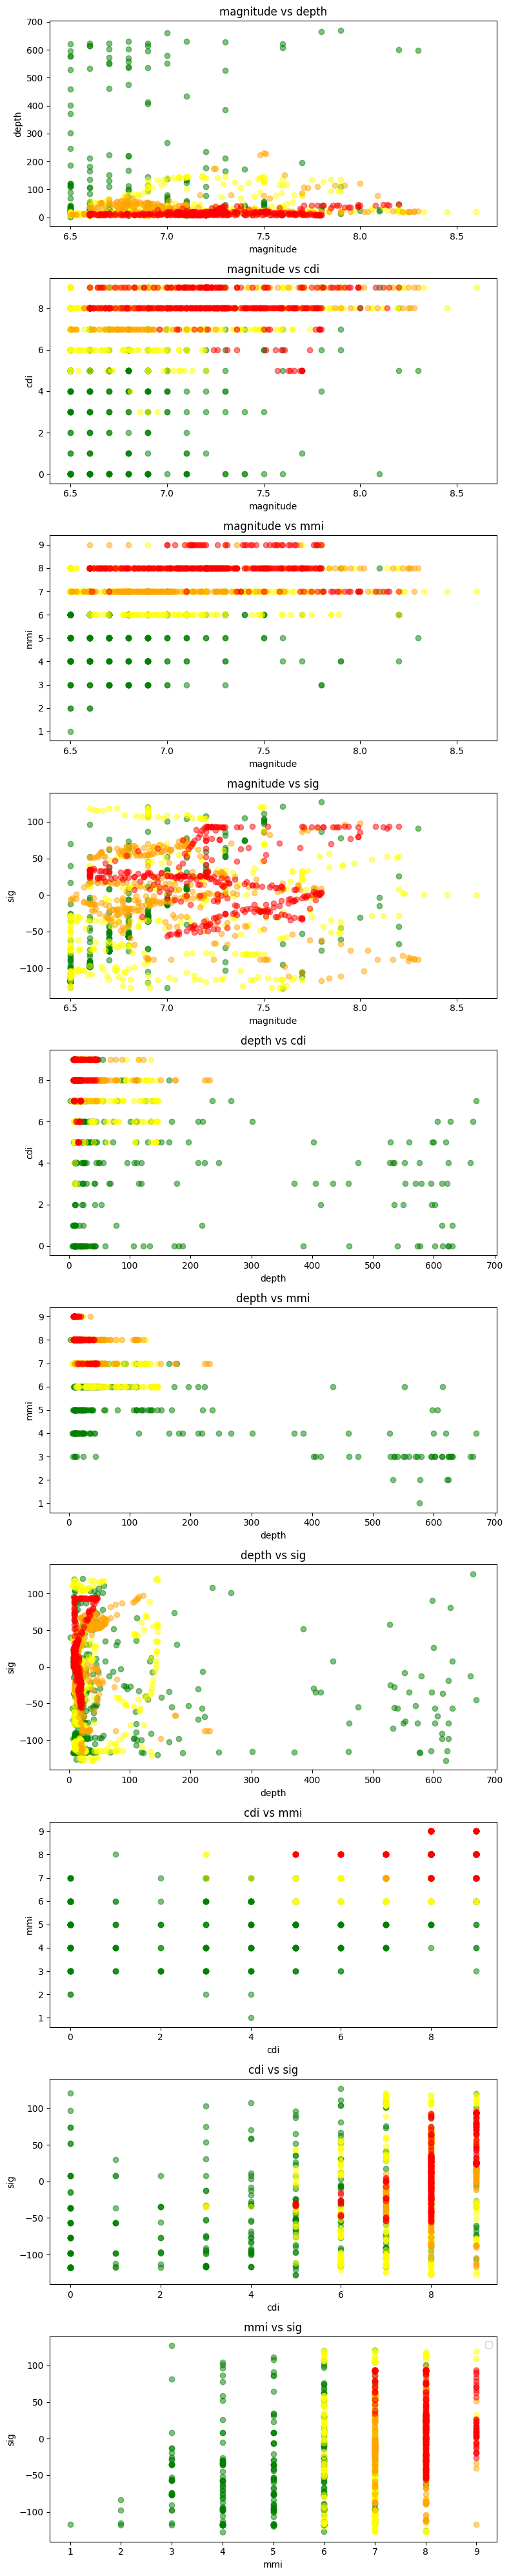

In [143]:

# Figure size: one plot per row
n_pairs = len(feature_pairs)
plt.figure(figsize=(8, n_pairs*4))  # width fixed, height grows with number of plots

# Map alert categories to colors
alert_colors = {'green':'green', 'yellow':'yellow', 'orange':'orange', 'red':'red'}

for i, (x_col, y_col) in enumerate(feature_pairs):
    plt.subplot(n_pairs, 1, i+1)  # single column of subplots
    for alert in alert_colors.keys():
        idx = data['alert'] == alert
        plt.scatter(data.loc[idx, x_col], data.loc[idx, y_col], 
                    color=alert_colors[alert], alpha=0.5, label=alert if i==0 else "")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{x_col} vs {y_col}')

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

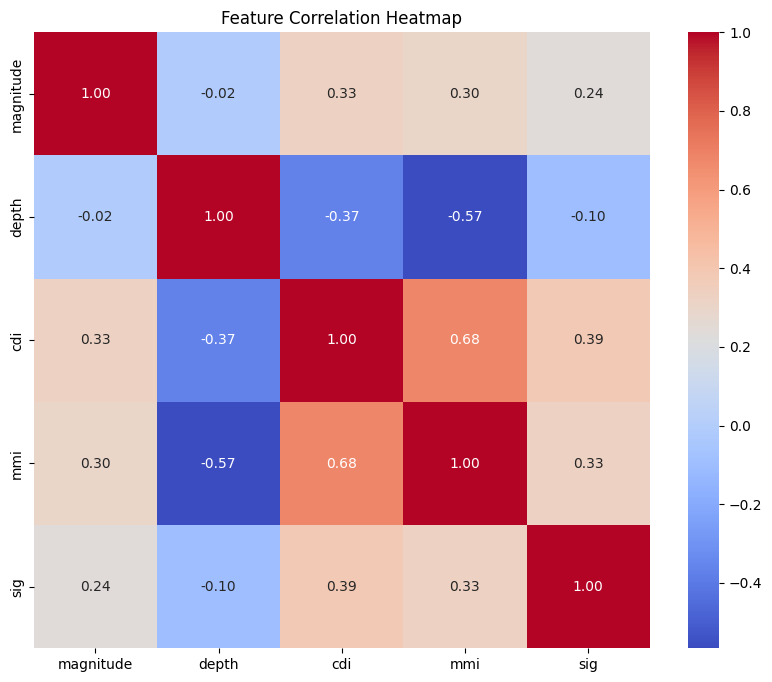

In [144]:

numeric_cols = data.select_dtypes(include='number').columns

corr_matrix = data[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Feature Correlation Heatmap")
plt.show()


In [145]:


df = data.copy()

le = LabelEncoder()
df['alert_encoded'] = le.fit_transform(df['alert'])  


In [146]:
df['alert_encoded']

0       0
1       0
2       0
3       0
4       0
       ..
1295    3
1296    3
1297    3
1298    3
1299    3
Name: alert_encoded, Length: 1300, dtype: int64

In [147]:
decoded = le.inverse_transform(df['alert_encoded'])


In [148]:
decoded

array(['green', 'green', 'green', ..., 'yellow', 'yellow', 'yellow'],
      dtype=object)

In [149]:

numeric_cols = df.select_dtypes(include='number').columns


In [150]:

corr_matrix = df[numeric_cols].corr()


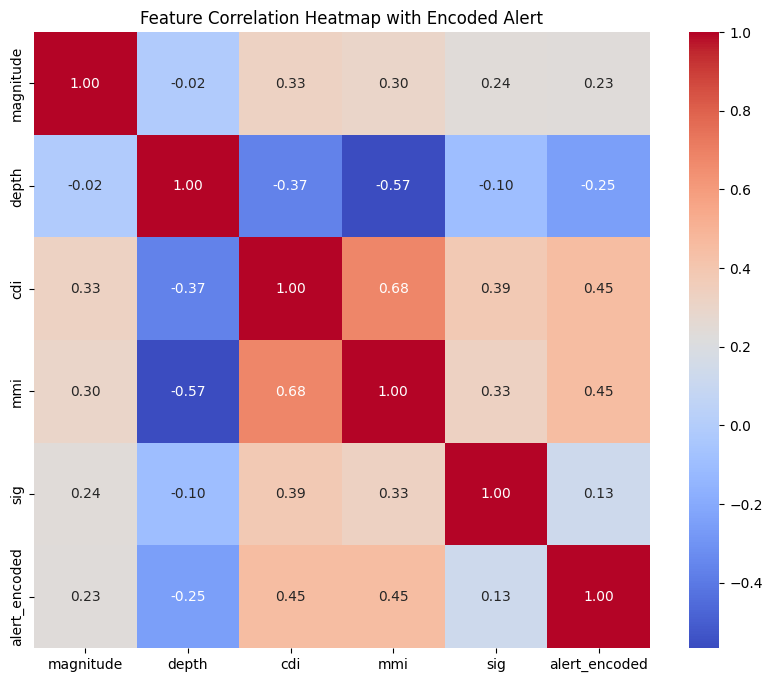

In [151]:

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Feature Correlation Heatmap with Encoded Alert")
plt.show()

In [152]:
import numpy as np

mean_mag = df['magnitude'].mean()
std_mag = df['magnitude'].std()

threshold = 3
upper_limit = mean_mag + threshold * std_mag
lower_limit = mean_mag - threshold * std_mag

df['magnitude'] = np.where(df['magnitude'] > upper_limit, upper_limit,
                           np.where(df['magnitude'] < lower_limit, lower_limit, df['magnitude']))

df['magnitude'].head()


0    7.0
1    6.9
2    7.0
3    7.3
4    6.6
Name: magnitude, dtype: float64

In [153]:

Q1 = df['depth'].quantile(0.25)
Q3 = df['depth'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['depth'] = df['depth'].copy()
df.loc[df['depth'] < lower_bound, 'depth'] = lower_bound
df.loc[df['depth'] > upper_bound, 'depth'] = upper_bound


In [154]:
df['sig'].head()

0     0.0
1   -33.0
2   -13.0
3    65.0
4   -98.0
Name: sig, dtype: float64

In [155]:
import numpy as np

mean_sig = df['sig'].mean()
std_sig = df['sig'].std()

threshold = 3
upper_limit_sig = mean_sig + threshold * std_sig
lower_limit_sig = mean_sig - threshold * std_sig

df['sig'] = np.where(df['sig'] > upper_limit_sig, upper_limit_sig,
                     np.where(df['sig'] < lower_limit_sig, lower_limit_sig, df['sig']))

df['sig'].head()


0     0.0
1   -33.0
2   -13.0
3    65.0
4   -98.0
Name: sig, dtype: float64

In [156]:
corr_matrix = df[numeric_cols].corr()


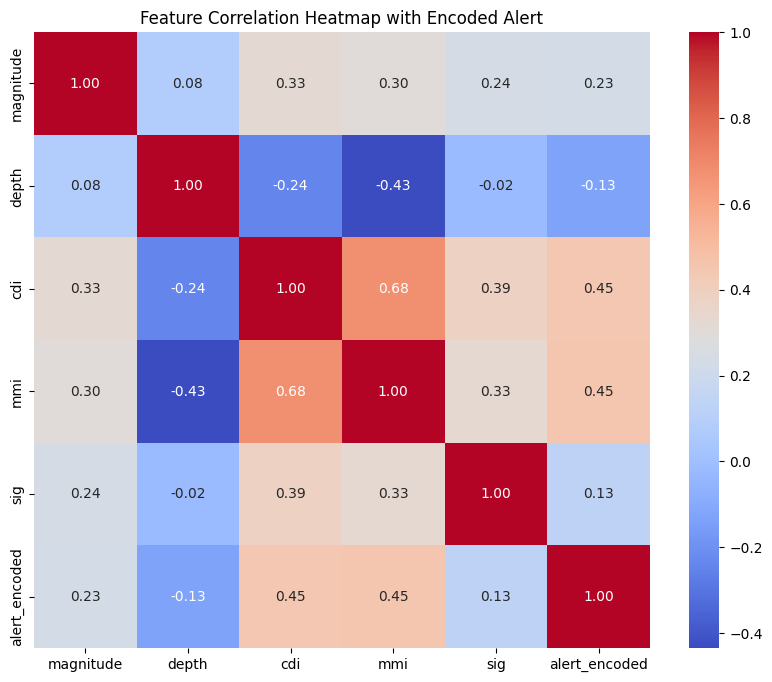

In [157]:

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Feature Correlation Heatmap with Encoded Alert")
plt.show()

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   magnitude      1300 non-null   float64
 1   depth          1300 non-null   float64
 2   cdi            1300 non-null   float64
 3   mmi            1300 non-null   float64
 4   sig            1300 non-null   float64
 5   alert          1300 non-null   object 
 6   alert_encoded  1300 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 71.2+ KB


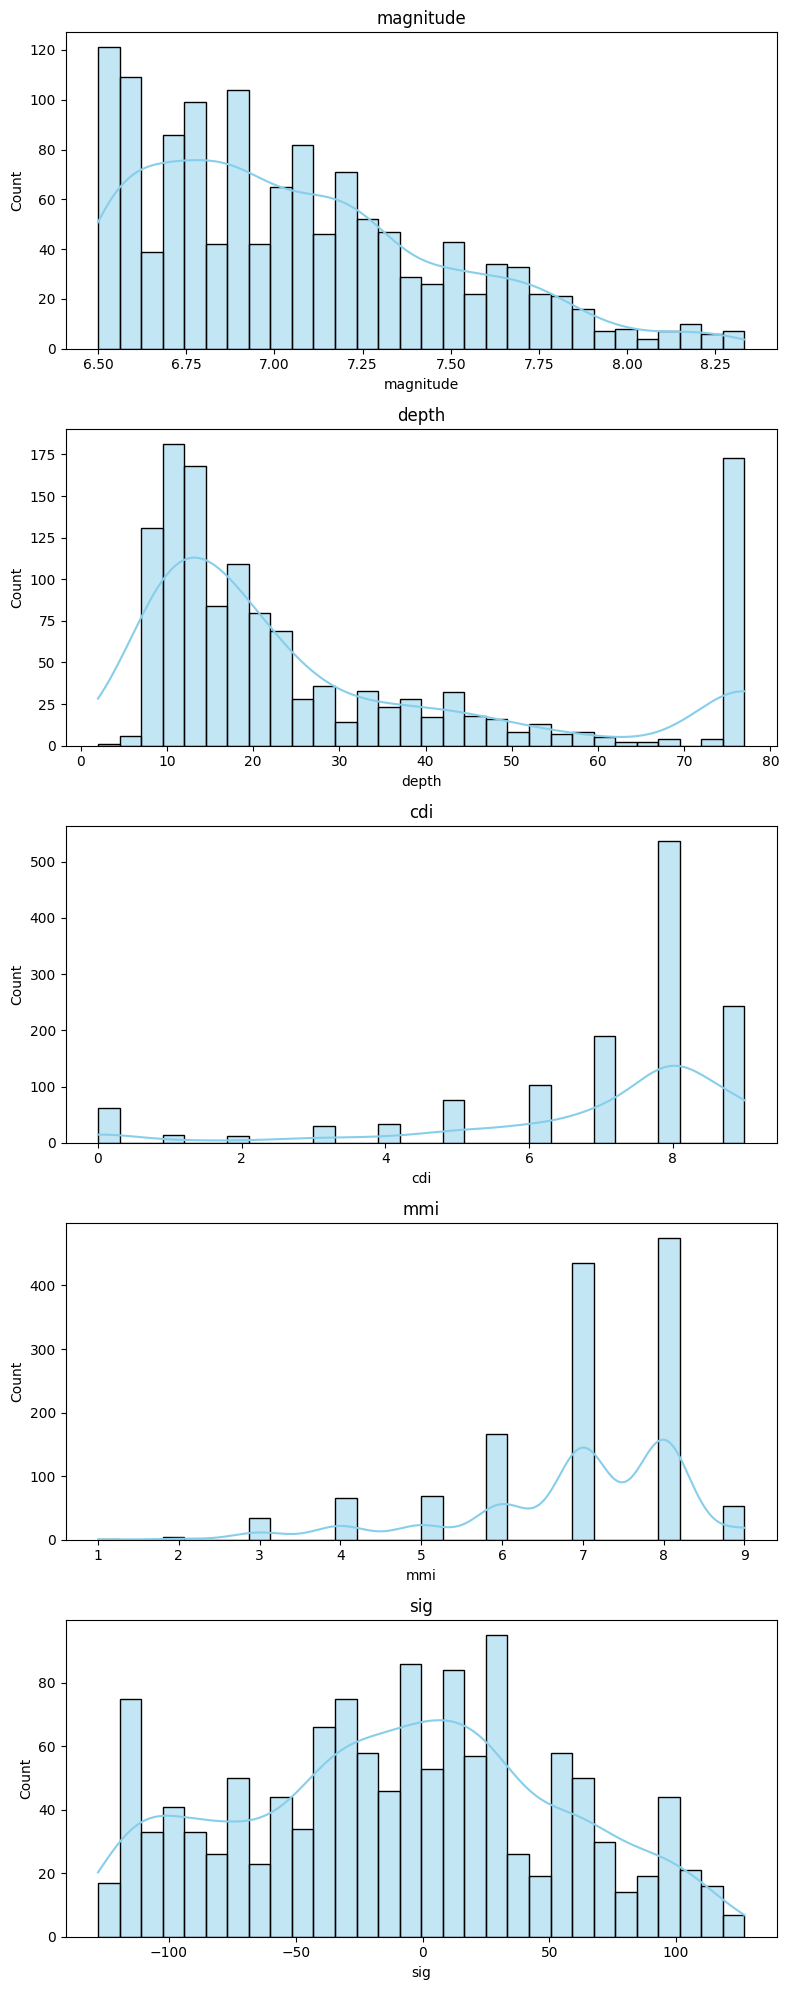

In [159]:

numeric_cols = ['magnitude', 'depth', 'cdi', 'mmi', 'sig']

plt.figure(figsize=(8, len(numeric_cols)*4))

for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()

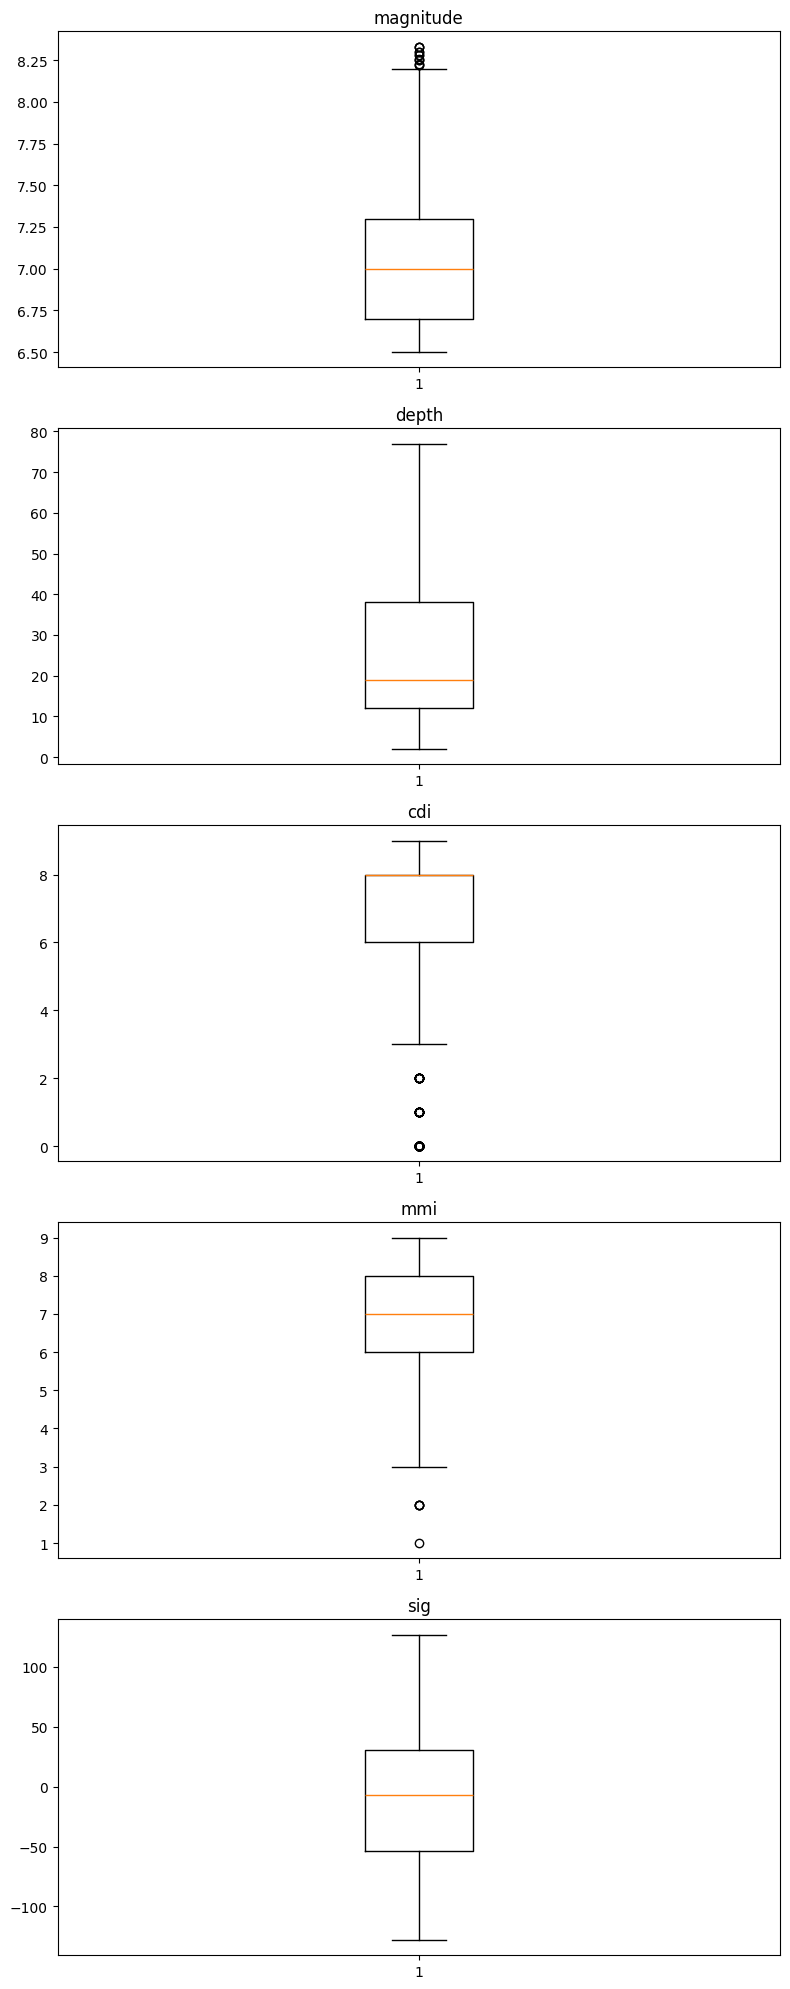

In [160]:

numeric_cols = ['magnitude', 'depth', 'cdi', 'mmi', 'sig']

plt.figure(figsize=(8, len(numeric_cols)*4))

for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i+1)
    plt.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [161]:
df.drop('alert',inplace=True,axis=1)


In [162]:
df.columns

Index(['magnitude', 'depth', 'cdi', 'mmi', 'sig', 'alert_encoded'], dtype='object')

In [163]:
X = df[['magnitude', 'depth', 'cdi', 'mmi', 'sig']]

In [164]:
y=df['alert_encoded']

In [165]:
y.unique()

array([0, 3, 1, 2])

In [166]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

In [167]:
rf_model = RandomForestClassifier(
    n_estimators=10,       
    max_depth=None,         
    min_samples_split=2,    
    min_samples_leaf=1,    
    max_features='sqrt',    
    bootstrap=True,         
    random_state=42,
    n_jobs=-1
)

In [168]:

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [169]:

print("----- Random Forest -----")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


----- Random Forest -----
[[43  0  1  5]
 [ 0 46  0  2]
 [ 1  2 45  1]
 [ 3  4  1 41]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        49
           1       0.88      0.96      0.92        48
           2       0.96      0.92      0.94        49
           3       0.84      0.84      0.84        49

    accuracy                           0.90       195
   macro avg       0.90      0.90      0.90       195
weighted avg       0.90      0.90      0.90       195



In [170]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=10000, multi_class='multinomial', solver='lbfgs')
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

/home/xlr8/miniconda3/envs/gpu-py311/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [171]:

print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


[[41  0  1  7]
 [ 0 21 13 14]
 [ 0  5 43  1]
 [ 7  7  7 28]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85        49
           1       0.64      0.44      0.52        48
           2       0.67      0.88      0.76        49
           3       0.56      0.57      0.57        49

    accuracy                           0.68       195
   macro avg       0.68      0.68      0.67       195
weighted avg       0.68      0.68      0.67       195



In [172]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print("----- KNN -----")
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))


----- KNN -----
[[36  2  5  6]
 [ 6 28  4 10]
 [ 0  3 44  2]
 [ 6  6  5 32]]
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        49
           1       0.72      0.58      0.64        48
           2       0.76      0.90      0.82        49
           3       0.64      0.65      0.65        49

    accuracy                           0.72       195
   macro avg       0.72      0.72      0.71       195
weighted avg       0.72      0.72      0.71       195



In [173]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


In [174]:
rf_model1 = RandomForestClassifier(
    n_estimators=200,       
    max_depth=None,         
    min_samples_split=2,    
    min_samples_leaf=1,    
    max_features='sqrt',    
    bootstrap=True,         
    random_state=42,
    n_jobs=-1
)



In [175]:

rf_model1.fit(X_train_scaled, y_train)
rf_pred1 = rf_model1.predict(X_test_scaled)

In [176]:
print("----- Random Forest -----")
print(confusion_matrix(y_test, rf_pred1))
print(classification_report(y_test, rf_pred1))

----- Random Forest -----
[[43  1  1  4]
 [ 1 44  0  3]
 [ 0  0 47  2]
 [ 1  3  1 44]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.91        49
           1       0.92      0.92      0.92        48
           2       0.96      0.96      0.96        49
           3       0.83      0.90      0.86        49

    accuracy                           0.91       195
   macro avg       0.92      0.91      0.91       195
weighted avg       0.92      0.91      0.91       195



In [177]:
from sklearn.linear_model import LogisticRegression

lr_model1 = LogisticRegression(max_iter=10000, multi_class='multinomial', solver='lbfgs')
lr_model1.fit(X_train_scaled, y_train)
lr_pred1 = lr_model1.predict(X_test_scaled)
print(confusion_matrix(y_test, lr_pred1))
print(classification_report(y_test, lr_pred1))



[[41  0  1  7]
 [ 0 21 13 14]
 [ 0  5 43  1]
 [ 7  7  7 28]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85        49
           1       0.64      0.44      0.52        48
           2       0.67      0.88      0.76        49
           3       0.56      0.57      0.57        49

    accuracy                           0.68       195
   macro avg       0.68      0.68      0.67       195
weighted avg       0.68      0.68      0.67       195



/home/xlr8/miniconda3/envs/gpu-py311/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [178]:
from sklearn.neighbors import KNeighborsClassifier

knn_model1 = KNeighborsClassifier()
knn_model1.fit(X_train_scaled, y_train)
knn_pred = knn_model1.predict(X_test_scaled)
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[39  1  1  8]
 [ 0 44  1  3]
 [ 0  0 48  1]
 [ 1  5  1 42]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88        49
           1       0.88      0.92      0.90        48
           2       0.94      0.98      0.96        49
           3       0.78      0.86      0.82        49

    accuracy                           0.89       195
   macro avg       0.89      0.89      0.89       195
weighted avg       0.89      0.89      0.89       195



In [179]:

from sklearn.metrics import make_scorer, f1_score


In [180]:

f1_macro_scorer = make_scorer(f1_score, average='macro')



In [181]:

rf_model = RandomForestClassifier(
    n_estimators=10,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)


In [182]:

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring=f1_macro_scorer   
)



In [183]:

grid_search.fit(X_train_scaled, y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END max_depth=N

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [10, 50, ...]}"
,scoring,make_scorer(f...average=macro)
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [184]:

best_rf_model = grid_search.best_estimator_


In [185]:

y_pred = best_rf_model.predict(X_test_scaled)


In [186]:

# 
print("Best Parameters:", grid_search.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Confusion Matrix:
 [[42  0  1  6]
 [ 1 44  0  3]
 [ 0  0 47  2]
 [ 1  4  0 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90        49
           1       0.92      0.92      0.92        48
           2       0.98      0.96      0.97        49
           3       0.80      0.90      0.85        49

    accuracy                           0.91       195
   macro avg       0.91      0.91      0.91       195
weighted avg       0.91      0.91      0.91       195



In [201]:

with open("best_rf_model.pkl", "wb") as f:
    pickle.dump(best_rf_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

print("Model, scaler, and label encoder saved successfully!")

Model, scaler, and label encoder saved successfully!


In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score


In [188]:

f1_macro_scorer = make_scorer(f1_score, average='macro')


In [189]:

log_model = LogisticRegression(max_iter=500, random_state=42)


In [190]:

log_param_grid = {
    'C': [0.1, 1, 10],        
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2']          
}



In [191]:

log_grid = GridSearchCV(
    estimator=log_model,
    param_grid=log_param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring=f1_macro_scorer
)


In [192]:

log_grid.fit(X_train_scaled, y_train)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......................C=1, penalty=l2, s

/home/xlr8/miniconda3/envs/gpu-py311/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/home/xlr8/miniconda3/envs/gpu-py311/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/home/xlr8/miniconda3/envs/gpu-py311/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will

,estimator,LogisticRegre...ndom_state=42)
,param_grid,"{'C': [0.1, 1, ...], 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']}"
,scoring,make_scorer(f...average=macro)
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [193]:

print("Best Logistic Regression Params:", log_grid.best_params_)
log_best = log_grid.best_estimator_
y_log_pred = log_best.predict(X_test_scaled)


Best Logistic Regression Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [194]:

knn_model = KNeighborsClassifier()


In [195]:

knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


In [196]:

knn_grid = GridSearchCV(
    estimator=knn_model,
    param_grid=knn_param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring=f1_macro_scorer
)


In [197]:

# Fit on training data
knn_grid.fit(X_train_scaled, y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s[CV] END ..metric=euclidean, n_neighbors=7, weigh

,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['euclidean', 'manhattan'], 'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,make_scorer(f...average=macro)
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,3


In [198]:

print("Best KNN Params:", knn_grid.best_params_)
knn_best = knn_grid.best_estimator_
y_knn_pred = knn_best.predict(X_test_scaled)


Best KNN Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [199]:

print("=== Logistic Regression ===")
print(confusion_matrix(y_test, y_log_pred))
print(classification_report(y_test, y_log_pred))

print("=== KNN ===")
print(confusion_matrix(y_test, y_knn_pred))
print(classification_report(y_test, y_knn_pred))

=== Logistic Regression ===
[[41  0  1  7]
 [ 0 21 13 14]
 [ 0  5 43  1]
 [ 7  7  6 29]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85        49
           1       0.64      0.44      0.52        48
           2       0.68      0.88      0.77        49
           3       0.57      0.59      0.58        49

    accuracy                           0.69       195
   macro avg       0.69      0.69      0.68       195
weighted avg       0.69      0.69      0.68       195

=== KNN ===
[[42  1  1  5]
 [ 1 44  1  2]
 [ 1  1 46  1]
 [ 3  5  0 41]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        49
           1       0.86      0.92      0.89        48
           2       0.96      0.94      0.95        49
           3       0.84      0.84      0.84        49

    accuracy                           0.89       195
   macro avg       0.89      0.89      0.89       195
weighted avg       0.89

In [200]:
import pickle

with open('RandomForestClassifier_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
